In [0]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline 
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import ElasticNet
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [0]:
names=['URL','First_Visit','Last_Visit','Click_Count','Frecency']
nn=['URL','First_Visit','Last_Visit','Click_Count','Frecency']
df=pd.read_csv('https://raw.githubusercontent.com/shawon100/Web-Log-Dataset/master/testpred.csv',names=names, na_filter=False)
#df['Time_Dif']=df['Time_Dif'].astype(int)
#dg=pd.read_csv('https://raw.githubusercontent.com/shawon100/Web-Log-Dataset/master/frecencyfinal.csv',names=names, na_filter=False)
dt=pd.read_csv('https://raw.githubusercontent.com/shawon100/Web-Log-Dataset/master/frecencyunix.csv',names=nn, na_filter=False)
df.head(100)

,URL,First_Visit,Last_Visit,Click_Count,Frecency
0,https://web.facebook.com/?_rdc=1&_rdr,1521241972,1522351859,177,56640
1,https://colab.research.google.com/drive/1T1taG...,1521251654,1522253582,46,48300
2,https://colab.research.google.com/drive/1XMYyf...,1520925873,1522352072,72,46728
3,http://localhost/phpmyadmin/,1518413861,1522075694,24,39312
4,http://localhost/mektekclass/registration.php,1519511384,1522076576,19,37050
5,https://mail.google.com/mail/u/0/#inbox,1516596003,1522352010,36,33264
6,https://github.com/shawon100,1517215489,1522352266,37,27528
7,https://console.starter-ca-central-1.openshift...,1511951021,1522024029,24,21788
8,http://localhost/mektekclass/mail/index.php,1522021604,1522024188,11,20914
9,https://colab.research.google.com/drive/1XMYyf...,1520935083,1521860902,57,14938


In [0]:
#df=df.drop('URL', axis=1)
#df=df.drop('Title',axis=1)
#df=df.drop('Length',axis=1)
#obj_df = df.select_dtypes(include=['object']).copy()
#obj_df.head()
#df.First_Visit = pd.to_datetime(df.First_Visit)

#df.head()
#df["First_Visit"].value_counts()
#df.First_Visit = pd.DatetimeIndex ( df.First_Visit ).astype ( np.int64 )/1000000
#df.Last_Visit = pd.DatetimeIndex ( df.Last_Visit ).astype ( np.int64 )/1000000
df['sub_visit']=df['Last_Visit'].sub(df['First_Visit'],axis=0)
dt['sub_visit']=dt['Last_Visit'].sub(dt['First_Visit'],axis=0)



#dt.First_Visit = pd.DatetimeIndex ( dt.First_Visit ).astype ( np.int64 )/1000000
#dt.Last_Visit = pd.DatetimeIndex ( dt.Last_Visit ).astype ( np.int64 )/1000000
#df.round(5)
#dt.round(5)
dt.head(100)



,URL,First_Visit,Last_Visit,Click_Count,Frecency,sub_visit
0,https://web.facebook.com/?_rdc=1&_rdr,1517407020,1520809140,543,95025,3402120
1,https://drive.google.com/drive/my-drive,1511916240,1520808300,28,30912,8892060
2,http://localhost/phpmyadmin/,1519419120,1520778600,16,13232,1359480
3,https://www.youtube.com/,1515287460,1520799060,22,12375,5511600
4,https://console.starter-ca-central-1.openshift...,1511746560,1520777880,22,9830,9031320
5,https://console.starter-ca-central-1.openshift...,1509489720,1520043900,20,9570,10554180
6,http://daler.org/,1520027280,1520780760,5,6270,753480
7,http://ruetoj-ruetoj.193b.starter-ca-central-1...,1517408760,1520783100,11,5955,3374340
8,http://ruetoc-ruetoc.193b.starter-ca-central-1...,1508093880,1520340120,22,5898,12246240
9,https://github.com/shawon100,1516319760,1520544900,24,5539,4225140


In [0]:
df['ratio']=df['Click_Count'].div(df['sub_visit'],axis=0)
dt['ratio']=dt['Click_Count'].div(dt['sub_visit'],axis=0)
df.head(10)

,URL,First_Visit,Last_Visit,Click_Count,Frecency,sub_visit,ratio
0,https://web.facebook.com/?_rdc=1&_rdr,1521241972,1522351859,177,56640,1109887,0.000159
1,https://colab.research.google.com/drive/1T1taG...,1521251654,1522253582,46,48300,1001928,0.000046
2,https://colab.research.google.com/drive/1XMYyf...,1520925873,1522352072,72,46728,1426199,0.000050
3,http://localhost/phpmyadmin/,1518413861,1522075694,24,39312,3661833,0.000007
4,http://localhost/mektekclass/registration.php,1519511384,1522076576,19,37050,2565192,0.000007
5,https://mail.google.com/mail/u/0/#inbox,1516596003,1522352010,36,33264,5756007,0.000006
6,https://github.com/shawon100,1517215489,1522352266,37,27528,5136777,0.000007
7,https://console.starter-ca-central-1.openshift...,1511951021,1522024029,24,21788,10073008,0.000002
8,http://localhost/mektekclass/mail/index.php,1522021604,1522024188,11,20914,2584,0.004257
9,https://colab.research.google.com/drive/1XMYyf...,1520935083,1521860902,57,14938,925819,0.000062


In [0]:
#obj_df["First_Visit"] = obj_df["First_Visit"].astype('category')
#obj_df.dtypes
y=np.array(df[names[4]])
yt=np.array(dt[nn[4]])
print(y)
y.shape


[56640 48300 46728 ...     0     0     0]


(6490,)

[Text(0,0.5,'Frecency'), Text(0.5,0,'Features')]

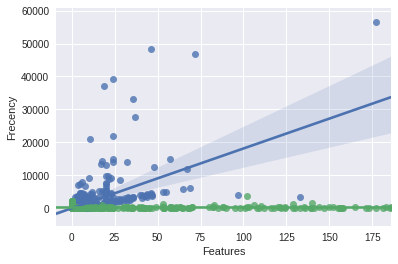

In [0]:
#print(y)
#sub=df['Last_Visit']-df['First_Visit']
#g=sns.jointplot(x=df['First_Visit'], y=df['Frecency'], kind='reg')
#sns.plt.ylim(0, 5000)
#sns.plt.xlim(1511251654, None)
dif=df['Last_Visit']-df['First_Visit']
ax=sns.regplot(df['Click_Count'],df['Frecency'])
#ax=sns.regplot(df['First_Visit'],df['Frecency'])
ax=sns.regplot(df['sub_visit'],df['Frecency'])
ax.set(xlabel='Features', ylabel='Frecency')
#sns.jointplot(x=df['sub_visit'], y=df['Frecency'], kind='reg')
#plt.xlim(3000000, 5000000)

In [0]:

X=np.array(df[['First_Visit','Last_Visit','Click_Count']])
#X=np.array(df[['sub_visit','Click_Count']])
Xf=np.array(dt[['URL','First_Visit','Last_Visit','Click_Count']])
#X=np.array(df[['Click_Count']])
#Xv=np.array(df[['Time_Dif']])
Xt=np.array(dt[['First_Visit','Last_Visit','Click_Count']])
#Xt=np.array(dt[['sub_visit','Click_Count']])

#X = preprocessing.scale(X)

#z=np.ones(2305,dtype=int)
#print(z)
#Xd=np.append(Xc, z, axis=1)

print(X[0:10])
print(Xt[0:10])
print(Xf[0:10])
X.shape
#Xc.shape



[[1521241972 1522351859        177]
 [1521251654 1522253582         46]
 [1520925873 1522352072         72]
 [1518413861 1522075694         24]
 [1519511384 1522076576         19]
 [1516596003 1522352010         36]
 [1517215489 1522352266         37]
 [1511951021 1522024029         24]
 [1522021604 1522024188         11]
 [1520935083 1521860902         57]]
[[1517407020 1520809140        543]
 [1511916240 1520808300         28]
 [1519419120 1520778600         16]
 [1515287460 1520799060         22]
 [1511746560 1520777880         22]
 [1509489720 1520043900         20]
 [1520027280 1520780760          5]
 [1517408760 1520783100         11]
 [1508093880 1520340120         22]
 [1516319760 1520544900         24]]
[['https://web.facebook.com/?_rdc=1&_rdr' 1517407020 1520809140 543]
 ['https://drive.google.com/drive/my-drive' 1511916240 1520808300 28]
 ['http://localhost/phpmyadmin/' 1519419120 1520778600 16]
 ['https://www.youtube.com/' 1515287460 1520799060 22]
 ['https://console.starte

(6490, 3)

In [0]:
#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5, random_state = 0)

#clf = MultinomialNB().fit(X_train, y_train)

clf=LinearRegression().fit(X,y)
#clf2=LinearRegression().fit(Xv,y)
# Fit regression model
#params = {'n_estimators': 100, 'max_depth': 3, 'min_samples_split': 2,'learning_rate': 0.01, 'loss': 'ls'}
#clf = ensemble.GradientBoostingRegressor(**params)

#clf.fit(X_train, y_train)
mse = mean_squared_error(yt, clf.predict(Xt))
#mse2 = mean_squared_error(y, clf2.predict(Xv))
print("MSE: %.4f" % mse)
rmse=np.sqrt(mse)
print("RMSE: %.4f" % rmse)
#print("MSE: %.4f" % mse2)
#print(X_train)
y_pred=clf.predict(Xt)
print(y_pred)



MSE: 586430.6574
RMSE: 765.7876
[ 1.02108267e+05  4.87365524e+03  2.90676280e+03 ... -6.40432159e+01
 -5.73994887e+01  1.35389753e+02]


In [0]:
def normalization(X_train, X_test):
    from sklearn import preprocessing
    scaler = preprocessing.StandardScaler().fit(X_train) 
    #mean = scaler.mean_
    #std = scaler.var_
    X_train_std = scaler.transform(X_train)
    X_test_std = scaler.transform(X_test)
    return X_train_std, X_test_std, scaler

def ridgeCV_reg_workflow(X,y):
    from sklearn.metrics import mean_squared_error, r2_score
    from sklearn.linear_model import RidgeCV
    #split into test/train and normalize
    #X_train, X_test, y_train, y_test = test_train_split(X,y)
    X_train, X_test, scaler = normalization(X,Xt)
    #another method to convert panda dataframes into normal arrays
    y_train,y_test = y.ravel(),yt.ravel()
    alphas = np.logspace(-4, 4, 14) #10**start, 10**end,num_samples,
    
    ridge_cv = RidgeCV(alphas=alphas)
    ridge_cv.fit(X_train,y_train)
    y_pred = ridge_cv.predict(X_test)
    ms=mean_squared_error(y_test, y_pred)
    rmse=np.sqrt(mse)
    print("Ridge CV Root Mean squared error:",rmse )
    print('Ridge CV Variance score aka r^2:', r2_score(y_test, y_pred))
    
    coef = ridge_cv.coef_
    alpha = ridge_cv.alpha_
    return y_test,y_pred,coef,alpha

ridge_y_test,ridge_y_pred,ridge_coef,ridge_alpha = ridgeCV_reg_workflow(X,y)
print('Ridge CV Regression coefficients', ridge_coef)
print('Ridge CV Regression optimal alpha', ridge_alpha)

Ridge CV Root Mean squared error: 771.9818163237006
Ridge CV Variance score aka r^2: 0.8768023419813848
Ridge CV Regression coefficients [-149.39797977  990.72969729]
Ridge CV Regression optimal alpha 142.51026703029993


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


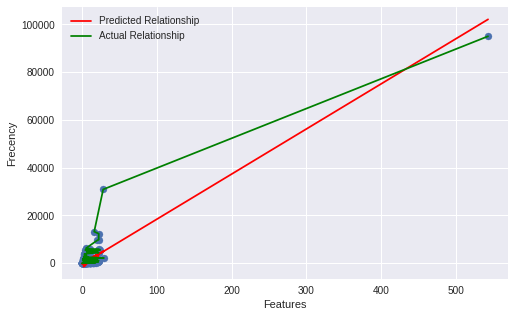

In [0]:
import matplotlib.patches as mpatches
Xp=dt['Click_Count']
plt.scatter(Xp, yt)
plt.plot(Xp, y_pred, color='red', label='Predicted Relationship')
x_actual = Xp
y_actual = yt
plt.plot(x_actual, y_actual, color='green', label='Actual Relationship')
plt.xlabel('Features')
plt.ylabel('Frecency')
plt.legend()
plt.rcParams["figure.figsize"] = [6,5]
plt.show()

#sns.jointplot(x=df['Click_Count'], y=df['Frecency'], kind='reg')

In [0]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
print(y_rbf)
y_lin = svr_lin.fit(X, y).predict(X)
print(y_lin)
y_poly = svr_poly.fit(X, y).predict(X)
print(y_poly)


[ 1.17067810e+03  1.17067810e+03  1.17067810e+03 ...  9.99375974e-02
  1.00454493e-01 -8.28575315e+02]


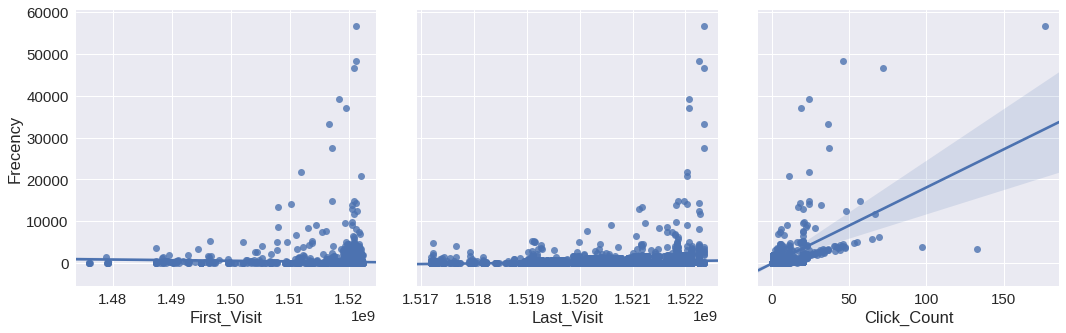

In [0]:
#from sklearn.pipeline import Pipeline
#text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

#text_clf = text_clf.fit(X_train, y_train)

#df.plot(x=['First_Visit','Last_Visit','Click_Count'],y='Frecency',kind='line')
#plt.xlabel('Click_Count')
#plt.ylabel('Frecency')
sns.set(font_scale=1.5)
g=sns.pairplot(data=df,x_vars=['First_Visit','Last_Visit','Click_Count'],y_vars='Frecency', kind='reg',size=5)
#g.fig.set_size_inches(12,5)
#sns.jointplot(x=['First_Visit','Last_Visit','Click_Count'],y='Frecency', kind='reg')


In [0]:
#print(Xt)

#from sklearn.metrics import r2_score
#r2_score_enet = r2_score(yt, clf)
#print(enet)
#print("r^2 on test data : %f" % r2_score_enet)
print(Xt[0:10])
print(yt[0:10])


In [0]:
#print(' Train Accuracy = ',metrics.accuracy_score(y_train,clf.predict(X_train)))
#print(' Test Accuracy = ',metrics.accuracy_score(y_test,clf.predict(X_test)))
#mytest=[[1.51740702e+12,1.52080914e+12,5.43000000e+02],[1.51191624e+12,1.52080830e+12,2.80000000e+01],[1.51941912e+12,1.52077860e+12,1.60000000e+01],
       #[1.51528746e+12,1.52079906e+12,2.20000000e+01],[1.51174656e+12,1.52077788e+12,2.20000000e+01],[1.50948972e+12,1.52004390e+12,2.00000000e+01]]

mytest=Xt[0:10]
print(clf.predict(mytest))


[102108.26739577   4873.65524393   2906.7627979    3875.38272088
   3736.23534832   3260.24010357    858.38310165   1886.06790212
   3586.61450138   4288.91698132]


In [0]:
mytest2=X[0:10]
print(clf.predict(mytest2))

[33331.54607579  8651.79110576 13538.51944334  4393.40708956
  3494.51853009  6586.81332804  6799.49395135  4139.24555112
  2085.08157806 10705.89432506]


In [0]:
print(clf.score(Xt,yt))

0.8762072274783038


In [0]:
yf=clf.predict(Xt)
yf=yf.reshape(2305,1)
#print(Xf)
#print(yf)
Xd=np.append(Xf,yf,axis=1)
print(Xd[:,1])
#print(Xd)
#Xf.shape


[1517407020 1511916240 1519419120 ... 1520594340 1520717760 1520799540]


In [0]:
submission = pd.DataFrame(Xd)

submission.to_csv('result.csv', index=False)

In [0]:
submission = pd.read_csv('result.csv')
submission.head()

,0,1,2,3,4
0,https://web.facebook.com/?_rdc=1&_rdr,1517407020,1520809140,543,102108.267396
1,https://drive.google.com/drive/my-drive,1511916240,1520808300,28,4873.655244
2,http://localhost/phpmyadmin/,1519419120,1520778600,16,2906.762798
3,https://www.youtube.com/,1515287460,1520799060,22,3875.382721
4,https://console.starter-ca-central-1.openshift...,1511746560,1520777880,22,3736.235348


In [0]:
#from google.colab import files
#files.download('result.csv')